In [2]:
import math as m
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def S(basis) :
    N = basis.shape[0]
    Overlap_matrix = np.zeros((N,N))
    for p in range(N) :
        for q in range(p,N) :
            Overlap_matrix[p,q] = (np.pi/(basis[p] + basis[q]))**(3/2)
            Overlap_matrix[q,p] = Overlap_matrix[p,q]
    return Overlap_matrix

def T(basis) :
    N = basis.shape[0]
    Kintetic_matrix = np.zeros((N,N))
    for p in range(N) :
        for q in range(p,N) :
            Kintetic_matrix[p,q] = 3*basis[p]*basis[q]*np.pi**(3/2)/(basis[p] + basis[q])**(5/2)
            Kintetic_matrix[q,p] = Kintetic_matrix[p,q]
    return Kintetic_matrix

def A(basis) :
    N = basis.shape[0]
    Coulomb_matrix = np.zeros((N,N))
    for p in range(N) :
        for q in range(p,N) :
            Coulomb_matrix[p,q] = -2*np.pi/(basis[p] + basis[q])
            Coulomb_matrix[q,p] = Coulomb_matrix[p,q]
    return Coulomb_matrix

def Gaussian(alpha, r):
    return m.exp(-alpha*r**2)

In [4]:
def Hydrogen1(a0,print_eigenfunction) :
    basis = np.array([a0])
    S_matrix = S(basis)
    T_matrix = T(basis)
    A_matrix = A(basis)

    eigenenergy, eigenfunction = eigh((T_matrix + A_matrix), S_matrix)
    eigenenergy = np.min(eigenenergy)
    if print_eigenfunction == 1 :
        eigenfunction = eigenfunction[:,np.argmin(eigenenergy)]
        print(eigenfunction)
    return eigenenergy

def Hydrogen2(a0,a1,print_eigenfunction) : 
    basis = np.array([a0, a1])
    S_matrix = S(basis)
    T_matrix = T(basis)
    A_matrix = A(basis)

    eigenenergy, eigenfunction = eigh((T_matrix + A_matrix), S_matrix)
    eigenenergy = np.min(eigenenergy)
    if print_eigenfunction == 1 :
        eigenfunction = eigenfunction[:,np.argmin(eigenenergy)]
        print(eigenfunction)
    return eigenenergy

def Hydrogen4(a0,a1,a2,a3,print_eigenfunction) :
    basis = np.array([a0, a1, a2, a3])
    S_matrix = S(basis)
    T_matrix = T(basis)
    A_matrix = A(basis)

    eigenenergy, eigenfunction = eigh((T_matrix + A_matrix), S_matrix)
    eigenenergy = np.min(eigenenergy)
    if print_eigenfunction == 1 :
        eigenfunction = eigenfunction[:,np.argmin(eigenenergy)]
        print(eigenfunction)
    return eigenenergy

[ 3.83000000e+02 -4.24413181e-01  2.82933421e-01 -9.80666104e-06]
[ 9.24000000e+02 -4.24413182e-01  2.82940798e-01  9.74618719e-06]
[ 1.0000000e+03 -4.2440225e-01  2.8007742e-01 -7.6382108e-03]


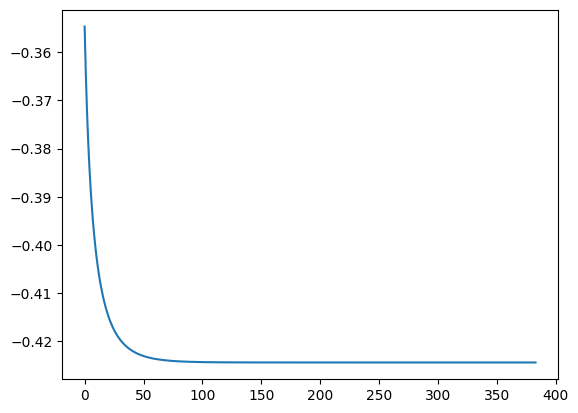

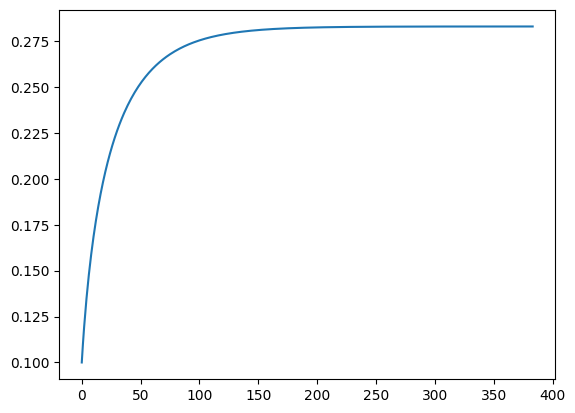

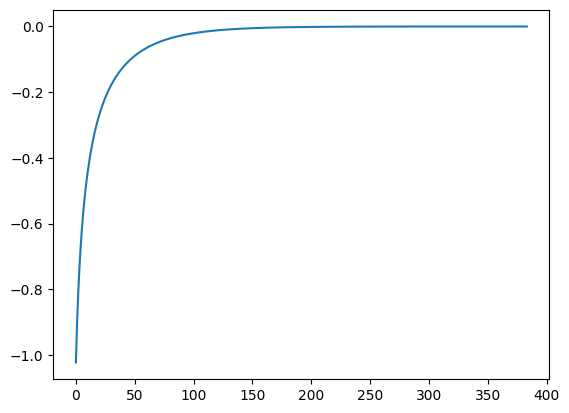

In [67]:
def gradient_descent1(a0,step_size,limit) :
    gradient = (Hydrogen1(a0+0.00001,0) - Hydrogen1(a0,0))/0.00001
    i = 0
    data = np.array([[i],[Hydrogen1(a0,0)],[a0],[gradient]])
    while i < limit and np.abs(gradient) > 0.00001:
        a0 = a0 - step_size*gradient 
        i += 1
        gradient = (Hydrogen1(a0+0.00001,0) - Hydrogen1(a0,0))/0.00001
        data = np.append(data,[[i],[Hydrogen1(a0,0)],[a0],[gradient]], axis = 1)
    return data

test1 = gradient_descent1(0.1,0.01,1000)
test2 = gradient_descent1(5,0.01,1000)
test3 = gradient_descent1(0.28,0.00001,1000)

for ele in range(1,4) :
    plt.figure(ele)
    plt.plot(test1[0,:],test1[ele,:])

print(test1[:,-1])
print(test2[:,-1])
print(test3[:,-1])

[ 1.39830000e+04 -4.85603542e-01  1.88166546e-01  1.22051882e+00
  9.99862423e-05]


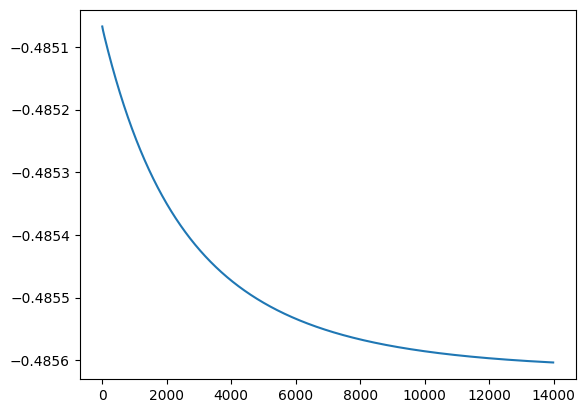

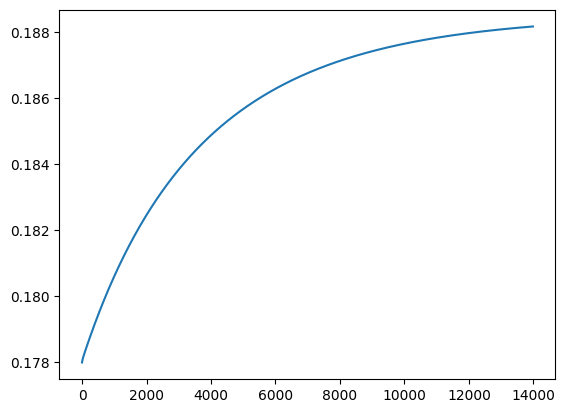

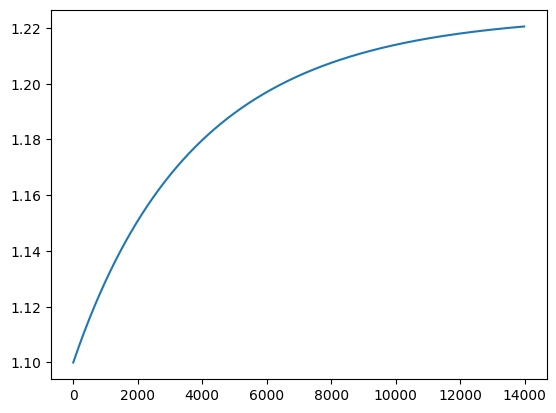

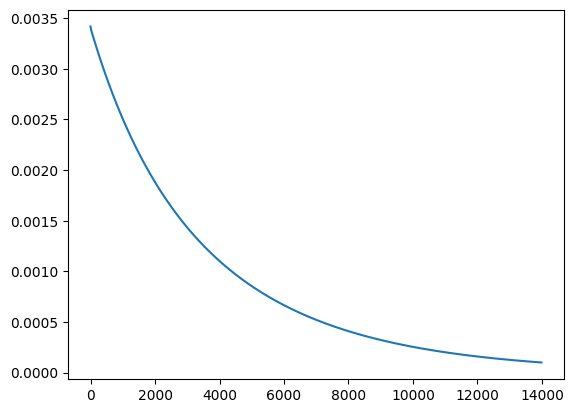

In [66]:
def gradient_descent2(a0,a1,step_size,limit) :
    gradient = np.array([[Hydrogen2(a0+step_size,a1,0) - Hydrogen2(a0,a1,0)], [Hydrogen2(a0,a1+step_size,0) - Hydrogen2(a0,a1,0)]])/step_size
    i = 0
    data = np.array([[i],[Hydrogen2(a0,a1,0)],[a0],[a1],[np.linalg.norm(gradient)]])
    while i < limit and np.linalg.norm(gradient) > 0.0001:
        a0 = a0 - step_size*gradient[0,0]
        a1 = a1 - step_size*gradient[1,0]
        i += 1
        gradient = np.array([[Hydrogen2(a0+step_size,a1,0) - Hydrogen2(a0,a1,0)], [Hydrogen2(a0,a1+step_size,0) - Hydrogen2(a0,a1,0)]])/step_size
        data = np.append(data,[[i],[Hydrogen2(a0,a1,0)],[a0],[a1],[np.linalg.norm(gradient)]], axis = 1)
    return data

test1 = gradient_descent2(0.178,1.1,0.01,16000)
for ele in range(1,5) :
    plt.figure(ele)
    plt.plot(test1[0,:],test1[ele,:])

print(test1[:,-1])

[ 9.07700000e+03 -4.99278385e-01  1.30025095e+01  1.96598557e+00
  4.45217806e-01  1.22047074e-01  9.99992727e-06]
[-0.09610152 -0.16301717 -0.18558699 -0.07370076]


-0.499278405667486

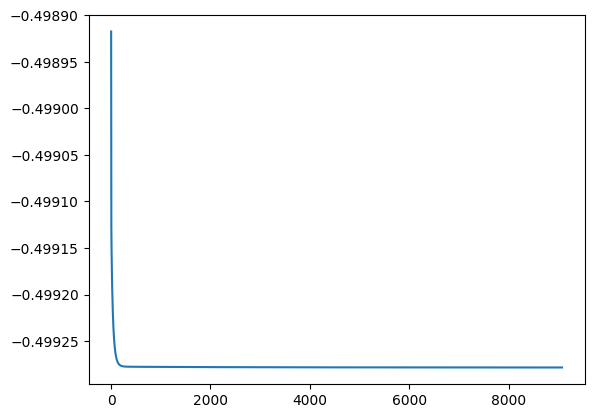

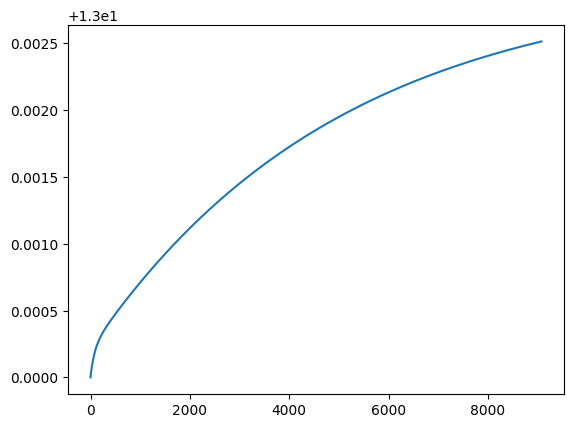

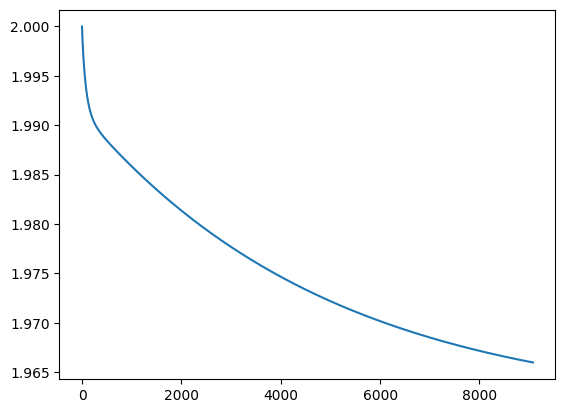

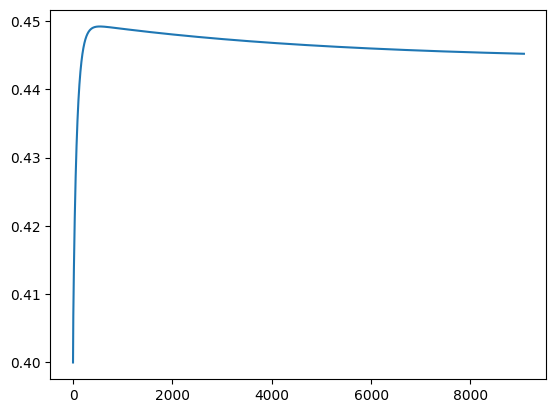

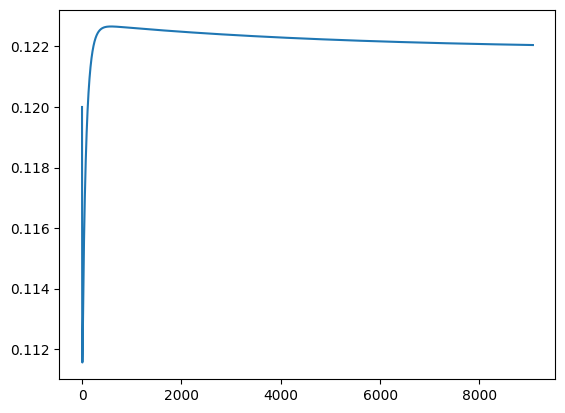

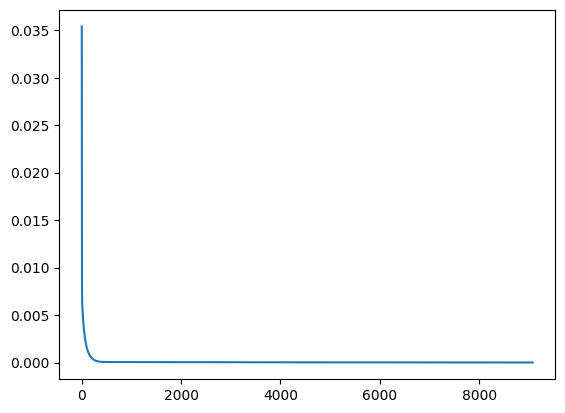

In [95]:
def gradient_descent4(a0,a1,a2,a3,step_size,limit) :
    gradient = np.array([[Hydrogen4(a0+0.00001,a1,a2,a3,0) - Hydrogen4(a0,a1,a2,a3,0)], [Hydrogen4(a0,a1+0.00001,a2,a3,0) - Hydrogen4(a0,a1,a2,a3,0)], [Hydrogen4(a0,a1,a2+0.00001,a3,0) - Hydrogen4(a0,a1,a2,a3,0)], [Hydrogen4(a0,a1,a2,a3+0.00001,0) - Hydrogen4(a0,a1,a2,a3,0)]])/0.00001
    i = 0
    data = np.array([[i],[Hydrogen4(a0,a1,a2,a3,0)],[a0],[a1],[a2],[a3],[np.linalg.norm(gradient)]])
    while i < limit and np.linalg.norm(gradient) > 0.00001:
        a0 = a0 - step_size*gradient[0,0]
        a1 = a1 - step_size*gradient[1,0]
        a2 = a2 - step_size*gradient[2,0]
        a3 = a3 - step_size*gradient[3,0]
        i += 1
        gradient = np.array([[Hydrogen4(a0+0.00001,a1,a2,a3,0) - Hydrogen4(a0,a1,a2,a3,0)], [Hydrogen4(a0,a1+0.00001,a2,a3,0) - Hydrogen4(a0,a1,a2,a3,0)], [Hydrogen4(a0,a1,a2+0.00001,a3,0) - Hydrogen4(a0,a1,a2,a3,0)], [Hydrogen4(a0,a1,a2,a3+0.00001,0) - Hydrogen4(a0,a1,a2,a3,0)]])/0.00001
        data = np.append(data,[[i],[Hydrogen4(a0,a1,a2,a3,0)],[a0],[a1],[a2],[a3],[np.linalg.norm(gradient)]], axis = 1)
    return data
test1 = gradient_descent4(13,2,0.4,0.12,0.1,10000)

for ele in range(1,7) :
    plt.figure(ele)
    plt.plot(test1[0,:],test1[ele,:])
print(test1[:,-1])
Hydrogen4(13.00773,1.962079,0.444529, 0.1219492,1)